# ДЗ 1. Введение, примеры задач, бизнес- и ML-метрики

## Метрики hit_rate@k, precision@k

Сравните метрики hit_rate@k, precision@k.   
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?

---

Сравниваем метрики:  
Hit rate@k = был ли хотя бы 1 релевантный товар среди топ-k рекомендованных  
Precision@k = кол-во рекомендованных товаров среди первых @k рекомендованных, которые были релевантны / кол-во рекомендованных товаров @k  

Precision@k не учитывает порядок элементов в «топе». Так, если из десяти элементов мы угадали только один, то не важно на каком месте он был: на первом, или на последнем. Очевидно, что первый вариант гораздо лучше.  

Однако в некоторых случаях использование precision@k предпочтительней, т.к. метрика является более информативной.

**Примеры:**  

1) Авиабилеты - клиент это пассажир, а товар рекомендованный рейс  
Здесь уместнее использовать hit_rate, чтобы на первые места выдачи попали самый дешевый, самый ранний и самый быстрый рейсы.  

2) Пицца - клиент это голодный студент :) а товар пицца  
Здесь уместнее использовать hit_rate, чтобы на первые места выдачи попали самая дешевая, самая большая и самая популярная пиццы - главное в этой задаче чтобы клиент меньше думал и больше покупал.

3) ВКонтакте (горизонтальная лента друзей) - клиент это пользователь, а товар другие пользователи ("возможно вы знакомы")  
Здесь уместнее использовать hit_rate, чтобы на первые места выдачи попадали те пользователи, с которыми "клиент" действительно может быть знаком, что повышает вероятность добавления в друзья.

## Метрика NDCG@k

В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в знаменателе присутствует логарифм.  

---

Логарифм используется для штрафования тех значений (делим на все большие числа), которые стоят дальше от топа выдачи.  
Вместо логарифма можно использовать сигмоид.

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [17]:
def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

<ipython-input-18-c2833aeb75ba>:5: RuntimeWarning: invalid value encountered in log
  y1 = np.log(x)


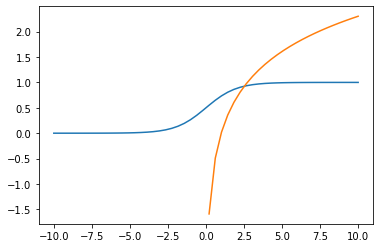

In [18]:
x = np.linspace(-10, 10)
y = sigmoid(x)

x1 = np.linspace(-10, 10)
y1 = np.log(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x1, y1)

## Другие метрики

Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики **и чем являются интеракции**, чтобы она могла быть использована).  

---

**Метрики на основе ранговой корреляции:** коэффициенты Спирмена (spearmanr) и Кендэлла (kendalltau).  
Коэффициент Спирмена - это непараметрическая мера ранговой корреляции (статистической зависимости между ранжированием двух переменных).  
Коэффициент Кендэлла является мерой, используемой для измерения порядковой связи между двумя измеряемыми величинами.

**Метрики на основе каскадной модели поведения:** Expected reciprocal rank и PFound.  
Expected reciprocal rank - метрика ранжирования, основанной на каскадной модели поведения.  
Каскадная модель предполагает, что пользователь просматривает ранжированные результаты поиска по порядку и для каждого документа оценивает, удовлетворяет ли документ запросу, и если да, то останавливает поиск.  
PFound — метрика качества ранжирования, использующая похожую на каскадную модель.

## Метрики pr@8, rec@8, AP@8, NDCG@8, RR@8, ERR@8

boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, RR@8, ERR@8 (expected reciprocal rank)  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)  

---

In [19]:
boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

### pr@8

In [20]:
pr_at_8 = (0 + 1 + 1 + 0 + 1 + 1 + 0 + 0) / 8
pr_at_8

0.5

In [21]:
def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    return precision

In [22]:
precision_at_k(recommended, boughted, k=2)

0.5

### rec@8

In [23]:
rec_at_8 = (0 + 1 + 1 + 0 + 1 + 1 + 0 + 0) / 6
rec_at_8

0.6666666666666666

In [24]:
def recall_at_k(recommended_list, bought_list, k=8):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall

In [25]:
recall_at_k(recommended, boughted)

0.6666666666666666

### AP@8

In [26]:
AP_at_8 = (0 + 1/2 + 2/3 + 0 + 3/5 + 4/6 + 0 + 0)/4
AP_at_8

0.6083333333333333

In [27]:
def ap_k(recommended_list, bought_list, k=8):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)

    flags = np.isin(recommended_list[:k], bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(0, k):
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i+1)
            sum_ += p_k

    result = sum_ / sum(flags)
    
    return result

In [28]:
ap_k(recommended, boughted, k=8)

0.6083333333333333

### RR@8

In [29]:
rr_at_8 = 0/(1) + 1/(2)
rr_at_8

0.5

In [30]:
def reciprocal_rank_at_k(recommended_list, bought_list, k=5):
    
    recommended_list = np.array(recommended_list)[:k]
    bought_list = np.array(bought_list)
    
    flags = np.isin(recommended_list, bought_list)

    for i in range(0, k):
        if flags[i]:
            ranks = 1 / (i+1)
            break
                
    return ranks

In [31]:
reciprocal_rank_at_k(recommended, boughted, k=8)

0.5

### ERR@8

In [32]:
err_at_8 = (0/(1+1) + 1/(2+1) + 1/(3+1) + 0/(4+1) + 1/(5+1) + 1/(6+1) + 0/(7+1) + 0/(8+1))/8
err_at_8

0.11160714285714285

In [33]:
def err_at_k(recommended_list, bought_list, k=5):
    
    recommended_list = np.array(recommended_list)[:k]
    bought_list = np.array(bought_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    ranks = 0
    for i in range(0, k):
        if flags[i]:
            ranks += 1 / (i+2)
                
    return ranks / len(recommended_list)

In [34]:
err_at_k(recommended, boughted, k=8)

0.11160714285714285